[大图](PCA.html), [下载](origin_files/PCA.ipynb)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA, FactorAnalysis, FastICA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import os
%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',na_values='?',
               header=None,index_col=0)#,names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name'])
df=df.loc[:,:5]
df=df.dropna(how='any')
df.head()

1  2  3  4  5
0                     
1000025  5  1  1  1  2
1002945  5  4  4  5  7
1015425  3  1  1  1  2
1016277  6  8  8  1  3
1017023  4  1  1  3  2

## 主成分分析


帮助文档
http://scikit-learn.org/stable/modules/decomposition.html#principal-component-analysis-pca

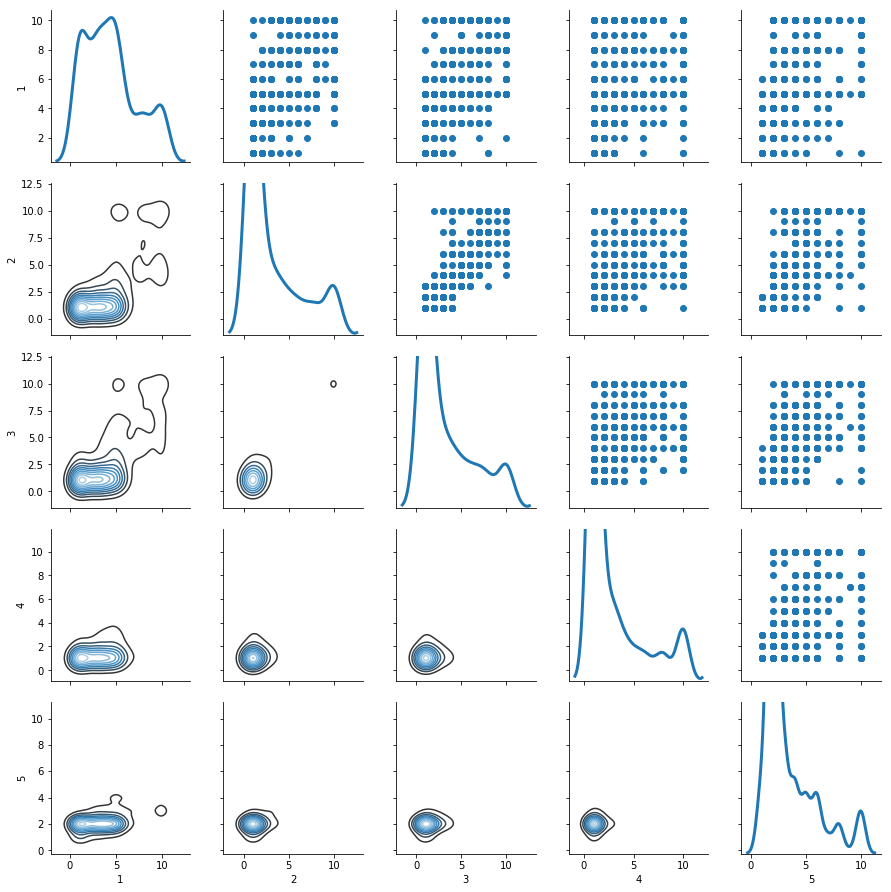

In [3]:
g = sns.PairGrid(df)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_diag(sns.kdeplot, lw=3, legend=False);

计算相关系数矩阵

In [4]:
 df.corr(method='pearson')

1         2         3         4         5
1  1.000000  0.644913  0.654589  0.486356  0.521816
2  0.644913  1.000000  0.906882  0.705582  0.751799
3  0.654589  0.906882  1.000000  0.683079  0.719668
4  0.486356  0.705582  0.683079  1.000000  0.599599
5  0.521816  0.751799  0.719668  0.599599  1.000000

## PCA
主成分说明文档
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

标准化，一般情况下都要做，这里省略

初次查看主成分的解释方差占比

In [5]:
pca = PCA(n_components=5, whiten=True)
newData = pca.fit_transform(df)
pca.explained_variance_ratio_ 

array([ 0.75145722,  0.10706531,  0.07473669,  0.04572444,  0.02101634])

观察数据可知，可以降到3维

In [6]:
pca = PCA(n_components=3, whiten=True)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [7]:
pca.explained_variance_#特征值
pca.explained_variance_ratio_ #特征值所占比例
pca.components_

array([[ 0.39707819,  0.53448626,  0.51557591,  0.42708267,  0.32929505],
       [-0.81516633,  0.07415778,  0.01266704,  0.56324215,  0.11226003],
       [ 0.40989222, -0.34732593, -0.34931222,  0.70661517, -0.30004839]])

In [8]:
score=pca.transform(df)

将打分结果和原始数据联结

In [9]:
score=pd.DataFrame(score,index=df.index,columns=['f1','f2','f3'])

In [10]:
data_new = df.join(score)
data_new.sort_values('f1').head()

1  2  3  4  5        f1        f2        f3
0                                                   
1320077  1  1  1  1  1 -0.947439  0.651416 -0.292565
1182404  4  2  1  1  2 -0.947439  0.651416 -0.292565
1218860  1  1  1  1  1 -0.947439  0.651416 -0.292565
1182404  1  1  1  1  1 -0.947439  0.651416 -0.292565
1218860  1  1  1  1  1 -0.947439  0.651416 -0.292565